## 1. Library

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 3.5 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
from warnings import simplefilter
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import shap
shap.initjs()

In [ ]:
def eval(evaluation,y_true,y_train_pred,name):
  a_dict = {}
  a_dict['MAE'] = mean_absolute_error(y_true,y_train_pred)
  a_dict['MSE'] = mean_squared_error(y_true,y_train_pred)
  a_dict['MAPE']= round(mean_absolute_percentage_error(y_true,y_train_pred),6)
  a_dict['R squared'] = r2_score(y_true,y_train_pred)
  a_dict['RMSE'] = np.sqrt(mean_squared_error(y_true,y_train_pred))
  a_dict['RMSLE'] = np.log(np.sqrt(mean_squared_error(y_true,y_train_pred)))
  evaluation[name] = a_dict

## 2. Dataset

In [ ]:
df = pd.read_csv(
    "Rice-Data-2018-2021.csv",
    index_col='Date',
    parse_dates=['Date'],
)

df.head()

Average Price of Premium Quality Rice  \
Date                                                
2018-01-01                               10349.91   
2018-02-01                               10381.74   
2018-03-01                                9892.56   
2018-04-01                                9524.96   
2018-05-01                                9523.88   

            Average Price of Medium Quality Rice  \
Date                                               
2018-01-01                              10177.05   
2018-02-01                              10215.16   
2018-03-01                               9698.23   
2018-04-01                               9220.84   
2018-05-01                               9190.37   

            Average Price of Bad Quality Rice  Harvest Area (10^6 ha)  \
Date                                                                    
2018-01-01                            9792.59                    0.54   
2018-02-01                            9987.10                    1.07   
2018-03-01                            9554.06                    1.77   
2018-04-01                            8991.36                    1.41   
2018-05-01                            9001.50                    1.00   

            Produksi Padi Nasional (10^6 Ton)  \
Date                                            
2018-01-01                               2.78   
2018-02-01                               5.74   
2018-03-01                               9.68   
2018-04-01                               7.60   
2018-05-01                               4.90   

            Produksi Beras Nasional (10^6 Ton)  Productivity (ku/ha)  
Date                                                                  
2018-01-01                                1.59                 51.48  
2018-02-01                                3.29                 53.64  
2018-03-01                                5.55                 54.69  
2018-04-01                                4.36                 53.90  
2018-05-01                                2.81                 49.00

In [ ]:
df = df.iloc[12:,:]

In [ ]:
df['Date'] = df.index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') 
df['Month'] = df['Date'].dt.month
df['Time'] = np.arange(len(df.index))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2019-01-01 to 2021-12-01
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Average Price of Premium Quality Rice  36 non-null     float64       
 1   Average Price of Medium Quality Rice   36 non-null     float64       
 2   Average Price of Bad Quality Rice      36 non-null     float64       
 3   Harvest Area (10^6 ha)                 36 non-null     float64       
 4   Produksi Padi Nasional (10^6 Ton)      36 non-null     float64       
 5   Produksi Beras Nasional (10^6 Ton)     36 non-null     float64       
 6   Productivity (ku/ha)                   36 non-null     float64       
 7   Date                                   36 non-null     datetime64[ns]
 8   Month                                  36 non-null     int64         
 9   Time                                   36 non-n

In [ ]:
df

Average Price of Premium Quality Rice  \
Date                                                
2019-01-01                               10111.08   
2019-02-01                               10007.91   
2019-03-01                                9814.53   
2019-04-01                                9464.68   
2019-05-01                                9462.05   
2019-06-01                                9515.51   
2019-07-01                                9519.35   
2019-08-01                                9530.00   
2019-09-01                                9594.39   
2019-10-01                                9659.17   
2019-11-01                                9742.16   
2019-12-01                                9838.26   
2020-01-01                               10032.66   
2020-02-01                               10080.80   
2020-03-01                               10082.43   
2020-04-01                               10018.19   
2020-05-01                                9826.63   
2020-06-01                                9918.95   
2020-07-01                                9931.71   
2020-08-01                                9962.65   
2020-09-01                                9871.12   
2020-10-01                                9812.90   
2020-11-01                                9714.50   
2020-12-01                                9787.86   
2021-01-01                                9780.19   
2021-02-01                                9772.10   
2021-03-01                                9606.97   
2021-04-01                                9549.76   
2021-05-01                                9627.08   
2021-06-01                                9537.16   
2021-07-01                                9401.61   
2021-08-01                                9499.36   
2021-09-01                                9455.56   
2021-10-01                                9449.47   
2021-11-01                                9539.29   
2021-12-01                                9672.54   

            Average Price of Medium Quality Rice  \
Date                                               
2019-01-01                               9902.68   
2019-02-01                               9799.57   
2019-03-01                               9555.35   
2019-04-01                               9144.20   
2019-05-01                               9142.52   
2019-06-01                               9166.40   
2019-07-01                               9211.03   
2019-08-01                               9224.00   
2019-09-01                               9301.08   
2019-10-01                               9433.88   
2019-11-01                               9522.01   
2019-12-01                               9565.59   
2020-01-01                               9805.40   
2020-02-01                               9844.13   
2020-03-01                               9826.68   
2020-04-01                               9671.03   
2020-05-01                               9526.55   
2020-06-01                               9445.31   
2020-07-01                               9316.30   
2020-08-01                               9334.90   
2020-09-01                               9404.58   
2020-10-01                               9462.81   
2020-11-01                               9384.98   
2020-12-01                               9382.69   
2021-01-01                               9404.74   
2021-02-01                               9386.31   
2021-03-01                               9153.68   
2021-04-01                               8978.86   
2021-05-01                               8909.50   
2021-06-01                               8906.67   
2021-07-01                               8886.90   
2021-08-01                               8915.75   
2021-09-01                               8962.39   
2021-10-01                               9010.82   
2021-11-01                               9071.94   
2021-12-01                               9128.44   

            Average 

In [ ]:
df.describe()

Average Price of Premium Quality Rice  \
count                              36.000000   
mean                             9727.516111   
std                               212.723329   
min                              9401.610000   
25%                              9535.370000   
50%                              9728.330000   
75%                              9883.077500   
max                             10111.080000   

       Average Price of Medium Quality Rice  \
count                             36.000000   
mean                            9335.824167   
std                              292.264972   
min                             8886.900000   
25%                             9139.000000   
50%                             9358.795000   
75%                             9523.145000   
max                             9902.680000   

       Average Price of Bad Quality Rice  Harvest Area (10^6 ha)  \
count                          36.000000               36.000000   
mean                         9018.168611                0.879444   
std                           279.274130                0.427912   
min                          8481.430000                0.290000   
25%                          8851.825000                0.557500   
50%                          9000.310000                0.795000   
75%                          9170.385000                1.097500   
max                          9536.300000                1.860000   

       Produksi Padi Nasional (10^6 Ton)  Produksi Beras Nasional (10^6 Ton)  \
count                          36.000000                           36.000000   
mean                            4.550556                            2.610833   
std                             2.212809                            1.290416   
min                             1.620000                            0.930000   
25%                             3.200000                            1.800000   
50%                             4.110000                            2.415000   
75%                             4.857500                            3.187500   
max                             9.670000                            5.600000   

       Productivity (ku/ha)     Month       Time  
count             36.000000  36.00000  36.000000  
mean              53.344722   6.50000  17.500000  
std               11.235960   3.50102  10.535654  
min               30.380000   1.00000   0.000000  
25%               48.970000   3.75000   8.750000  
50%               52.115000   6.50000  17.500000  
75%               54.727500   9.25000  26.250000  
max               86.380000  12.00000  35.000000

In [ ]:
df = df.drop(columns=['Date'])

# 3. Exploratory Data Analysis (EDA)

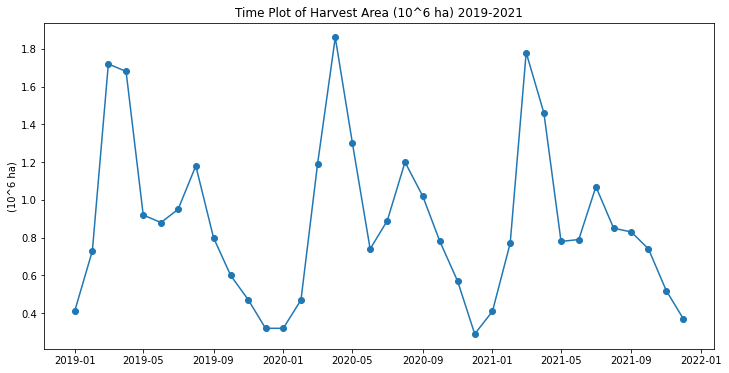

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df['Harvest Area (10^6 ha)'],marker='o') 
plt.title('Time Plot of Harvest Area (10^6 ha) 2019-2021')
plt.ylabel("(10^6 ha)")
plt.show()

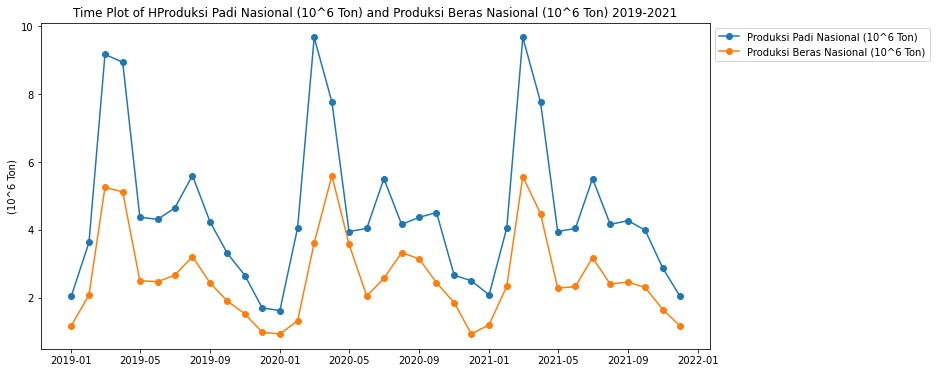

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df['Produksi Padi Nasional (10^6 Ton)'],marker='o',label = 'Produksi Padi Nasional (10^6 Ton)') 
plt.plot(df['Produksi Beras Nasional (10^6 Ton)'],marker='o',label = 'Produksi Beras Nasional (10^6 Ton)') 
plt.title('Time Plot of HProduksi Padi Nasional (10^6 Ton) and Produksi Beras Nasional (10^6 Ton) 2019-2021')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.ylabel("(10^6 Ton)")
plt.show()

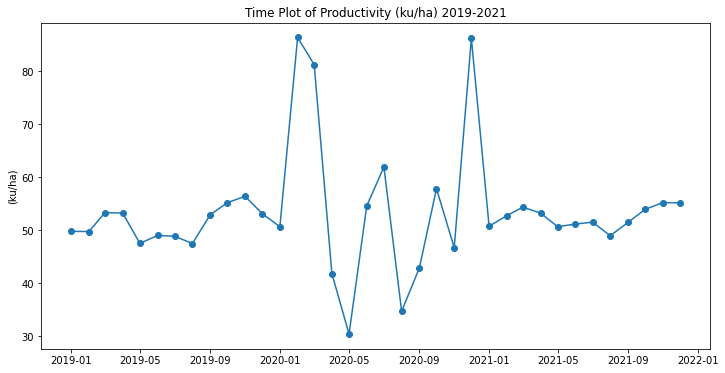

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df['Productivity (ku/ha)'],marker='o') 
plt.title('Time Plot of Productivity (ku/ha) 2019-2021')
plt.ylabel("(ku/ha)")
plt.show()

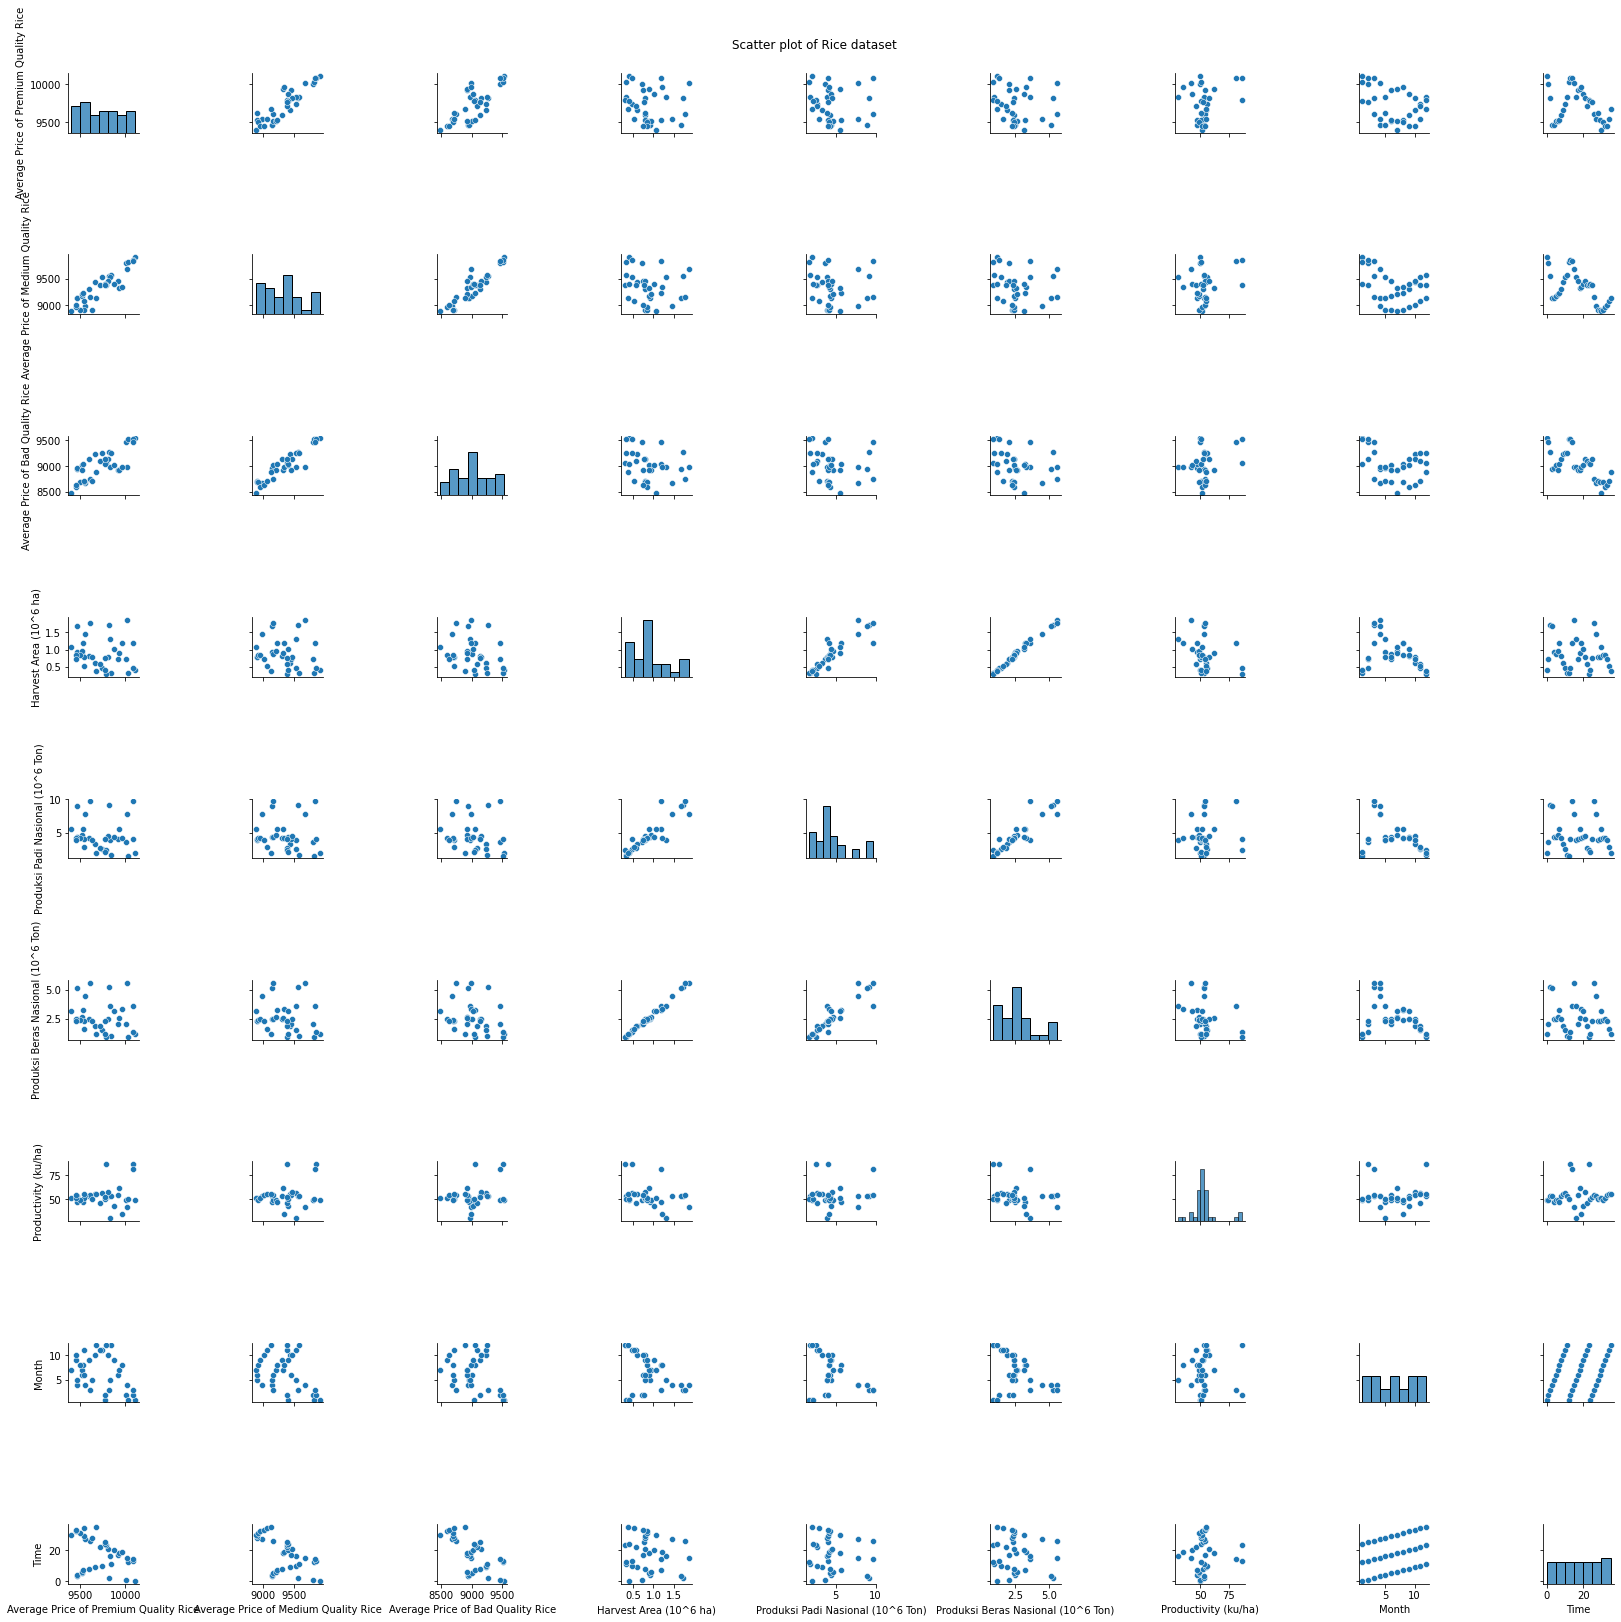

In [ ]:
df_plot = df.copy()

g = sns.pairplot(df_plot)
g.fig.suptitle('Scatter plot of Rice dataset')
plt.tight_layout()
plt.show()

    From the results of the Scatter plots above, the following analysis results are obtained: 
    There are several features that have a linear relationship, 
    namely the relationship between Average Price of Premium Quality Rice, Average Price of Medium Quality Rice, and Average Price of Bad Quality Rice. 
    In addition, between harvest area, National Rice Production, and National Rice Production. 
    As well as between time and month.

# 4. Feature Engineering

## Feature Scalling (Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscalar_premium = MinMaxScaler()
df[['Average Price of Premium Quality Rice']] = mmscalar_premium.fit_transform(df[['Average Price of Premium Quality Rice']])

In [ ]:
mmscalar_medium = MinMaxScaler()
df[['Average Price of Medium Quality Rice']] = mmscalar_medium.fit_transform(df[['Average Price of Medium Quality Rice']])

In [ ]:
mmscalar_bad = MinMaxScaler()
df[['Average Price of Bad Quality Rice']] = mmscalar_bad.fit_transform(df[['Average Price of Bad Quality Rice']])

In [ ]:
mmscalar_harvest = MinMaxScaler()
df[['Harvest Area (10^6 ha)']] = mmscalar_harvest.fit_transform(df[['Harvest Area (10^6 ha)']])

In [ ]:
mmscalar_padi = MinMaxScaler()
df[['Produksi Padi Nasional (10^6 Ton)']] = mmscalar_padi.fit_transform(df[['Produksi Padi Nasional (10^6 Ton)']])

In [ ]:
mmscalar_beras = MinMaxScaler()
df[['Produksi Beras Nasional (10^6 Ton)']] = mmscalar_beras.fit_transform(df[['Produksi Beras Nasional (10^6 Ton)']])

In [ ]:
mmscalar_prod = MinMaxScaler()
df[['Productivity (ku/ha)']] = mmscalar_prod.fit_transform(df[['Productivity (ku/ha)']])

In [ ]:
mmscalar_month = MinMaxScaler()
df[['Month']] = mmscalar_month.fit_transform(df[['Month']])

In [ ]:
mmscalar_month = MinMaxScaler()
df[['Time']] = mmscalar_month.fit_transform(df[['Time']])

##  Correlation Matrix

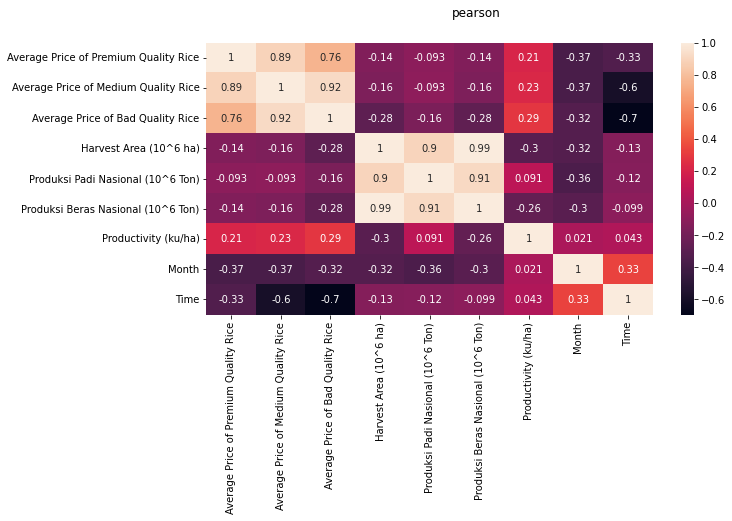

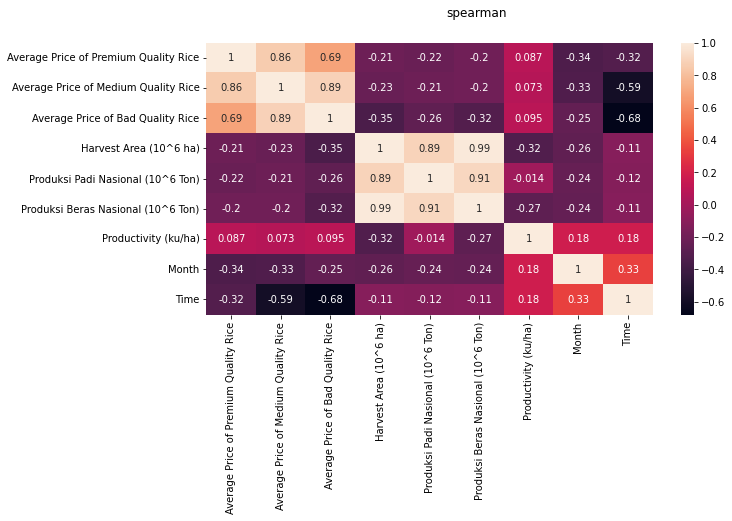

In [ ]:
items = ['pearson', 'spearman']
for item in items:
    fig, axe = plt.subplots(figsize=(10,5))
    fig.suptitle(item)
    sns.heatmap(df.corr(method=item, numeric_only=True), annot=True)
    plt.show()


# 4.1 Correlation for Average Price of Premium Quality Rice

In [ ]:
df.corr(method='pearson', numeric_only=True).sort_values('Average Price of Premium Quality Rice', ascending=False)['Average Price of Premium Quality Rice']

Average Price of Premium Quality Rice    1.000000
Average Price of Medium Quality Rice     0.892617
Average Price of Bad Quality Rice        0.757261
Productivity (ku/ha)                     0.212456
Produksi Padi Nasional (10^6 Ton)       -0.093068
Harvest Area (10^6 ha)                  -0.141796
Produksi Beras Nasional (10^6 Ton)      -0.144700
Time                                    -0.331576
Month                                   -0.368033
Name: Average Price of Premium Quality Rice, dtype: float64

By using Pearson, It seems like Average Price of Medium Quality Rice, Average Price of Bad Quality Rice, and Productivity (ku/ha) have a positive correlation with Average Price of Premium Quality Rice

In [ ]:
df.corr(method='spearman', numeric_only=True).sort_values('Average Price of Premium Quality Rice', ascending=False)['Average Price of Premium Quality Rice']

Average Price of Premium Quality Rice    1.000000
Average Price of Medium Quality Rice     0.861776
Average Price of Bad Quality Rice        0.690862
Productivity (ku/ha)                     0.087001
Produksi Beras Nasional (10^6 Ton)      -0.195392
Harvest Area (10^6 ha)                  -0.207403
Produksi Padi Nasional (10^6 Ton)       -0.223424
Time                                    -0.315315
Month                                   -0.335401
Name: Average Price of Premium Quality Rice, dtype: float64

Using Spearman, the features correlated with the Average Price of Premium Quality Rice are similar

# 4.2 Correlation for Average Price of Medium Quality Rice

In [ ]:
df.corr(method='pearson', numeric_only=True).sort_values('Average Price of Medium Quality Rice', ascending=False)['Average Price of Medium Quality Rice']

Average Price of Medium Quality Rice     1.000000
Average Price of Bad Quality Rice        0.923962
Average Price of Premium Quality Rice    0.892617
Productivity (ku/ha)                     0.228019
Produksi Padi Nasional (10^6 Ton)       -0.092563
Produksi Beras Nasional (10^6 Ton)      -0.157504
Harvest Area (10^6 ha)                  -0.158175
Month                                   -0.367191
Time                                    -0.595496
Name: Average Price of Medium Quality Rice, dtype: float64

By using Pearson, It seems like Average Price of Premium Quality Rice, Average Price of Bad Quality Rice, and Productivity (ku/ha) have a positive correlation with Average Price of Medium Quality Rice

In [ ]:
df.corr(method='spearman', numeric_only=True).sort_values('Average Price of Medium Quality Rice', ascending=False)['Average Price of Medium Quality Rice']

Average Price of Medium Quality Rice     1.000000
Average Price of Bad Quality Rice        0.885714
Average Price of Premium Quality Rice    0.861776
Productivity (ku/ha)                     0.072844
Produksi Beras Nasional (10^6 Ton)      -0.199897
Produksi Padi Nasional (10^6 Ton)       -0.211706
Harvest Area (10^6 ha)                  -0.229804
Month                                   -0.326105
Time                                    -0.590219
Name: Average Price of Medium Quality Rice, dtype: float64

By using spearman, most of the correlated features with Average Price of Medium Quality Rice Rice are similar

# 4.3 Correlation for Average Price of Bad Quality Rice

In [ ]:
df.corr(method='pearson', numeric_only=True).sort_values('Average Price of Bad Quality Rice', ascending=False)['Average Price of Bad Quality Rice']

Average Price of Bad Quality Rice        1.000000
Average Price of Medium Quality Rice     0.923962
Average Price of Premium Quality Rice    0.757261
Productivity (ku/ha)                     0.285900
Produksi Padi Nasional (10^6 Ton)       -0.164253
Produksi Beras Nasional (10^6 Ton)      -0.277309
Harvest Area (10^6 ha)                  -0.278471
Month                                   -0.323123
Time                                    -0.695642
Name: Average Price of Bad Quality Rice, dtype: float64

By using Pearson, It seems like Average Price of Premium Quality Rice, Average Price of Medium Quality Rice, and Productivity (ku/ha) have a positive correlation with Average Price of Bad Quality Rice

In [ ]:
df.corr(method='spearman', numeric_only=True).sort_values('Average Price of Bad Quality Rice', ascending=False)['Average Price of Bad Quality Rice']

Average Price of Bad Quality Rice        1.000000
Average Price of Medium Quality Rice     0.885714
Average Price of Premium Quality Rice    0.690862
Productivity (ku/ha)                     0.094981
Month                                   -0.248646
Produksi Padi Nasional (10^6 Ton)       -0.263988
Produksi Beras Nasional (10^6 Ton)      -0.315999
Harvest Area (10^6 ha)                  -0.346830
Time                                    -0.678764
Name: Average Price of Bad Quality Rice, dtype: float64

By using spearman, most of the correlated features with Average Price of Bad Quality Rice Rice are similar

# 5. Split dataset to train and test datasets
    df_train is rice data from 2019-2020
    df_test is rice data in 2021

In [ ]:
df_train = df.iloc[:24,:]
df_test = df.iloc[24:,:]

In [ ]:
# Training data
Time_train = df_train.loc[:, ['Time']]  # features
Monthly_train = df_train.loc[:, ['Month']]  # features
x_premium_train = df_train.loc[:, df_train.columns != 'Average Price of Premium Quality Rice'] # features
x_medium_train = df_train.loc[:, df_train.columns != 'Average Price of Medium Quality Rice'] # features
x_bad_train = df_train.loc[:, df_train.columns != 'Average Price of Bad Quality Rice'] # features
HargaBerasPremium_train = df_train.loc[:, 'Average Price of Premium Quality Rice']  # target
HargaBerasMedium_train = df_train.loc[:, 'Average Price of Medium Quality Rice']  # target
HargaBerasLuarkualitas_train = df_train.loc[:, 'Average Price of Bad Quality Rice'] # target

In [ ]:
# Test Data
Time_test = df_test.loc[:, ['Time']]  # features
Monthly_test = df_test.loc[:, ['Month']]  # features
x_premium_test = df_test.loc[:, df_test.columns != 'Average Price of Premium Quality Rice'] # features
x_medium_test = df_test.loc[:, df_test.columns != 'Average Price of Medium Quality Rice'] # features
x_bad_test = df_test.loc[:, df_test.columns != 'Average Price of Bad Quality Rice'] # features
HargaBerasPremium_test = df_test.loc[:, 'Average Price of Premium Quality Rice']  # target
HargaBerasMedium_test = df_test.loc[:, 'Average Price of Medium Quality Rice']  # target
HargaBerasLuarkualitas_test = df_test.loc[:, 'Average Price of Bad Quality Rice'] # target

In [ ]:
evaluation_train = {}
evaluation_test = {}

### SIMPLE LINEAR REGRESSION
### Average Price of Premium Quality Rice

In [ ]:
# Train the model
model = LinearRegression()
model.fit(Time_train, HargaBerasPremium_train)

# Koefisien model
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)
accuracy = model.score(Time_train, HargaBerasPremium_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [0.41956154]
Intercept:  0.4295188896876074
Model Accuracy:  0.08337566624916481


Predicting on Train Data

In [ ]:
AvgPricePremium_train = pd.Series(model.predict(Time_train), index=Time_train.index)

eval(evaluation_train,HargaBerasPremium_train,AvgPricePremium_train,'Train SLR Premium')

Predicting on Test Data

In [ ]:
AvgPricePremium_pred = pd.Series(model.predict(Time_test), index=Time_test.index)

eval(evaluation_test,HargaBerasPremium_test,AvgPricePremium_pred,'Test SLR Premium')

### Multiple Linear Regression
### Average Price of Premium Quality Rice

In [ ]:
regr = LinearRegression()
regr.fit(x_premium_train,HargaBerasPremium_train)

print('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

accuracy = regr.score(x_premium_train,HargaBerasPremium_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [ 1.33106668 -0.38872708  0.45522307  0.29690322 -0.77191604 -0.14921337
 -0.12383791  0.49726441]
Intercept:  0.00254562696499383
Model Accuracy:  0.8997506898369754


Predicting on Train Data

In [ ]:
AvgPricePremium_train_v2 = pd.Series(regr.predict(x_premium_train), index=x_premium_train.index)

eval(evaluation_train,HargaBerasPremium_train,AvgPricePremium_train_v2,'Train MLR Premium')

Predicting on Test Data

In [ ]:
AvgPricePremium_pred_v2 = pd.Series(regr.predict(x_premium_test), index=x_premium_test.index)

eval(evaluation_test,HargaBerasPremium_test,AvgPricePremium_pred_v2,'Test MLR Premium')

explain the model's predictions using SHAP

Shapley on Train Data

In [ ]:
explainer = shap.Explainer(regr, x_premium_train)
shap_values = explainer(x_premium_train)

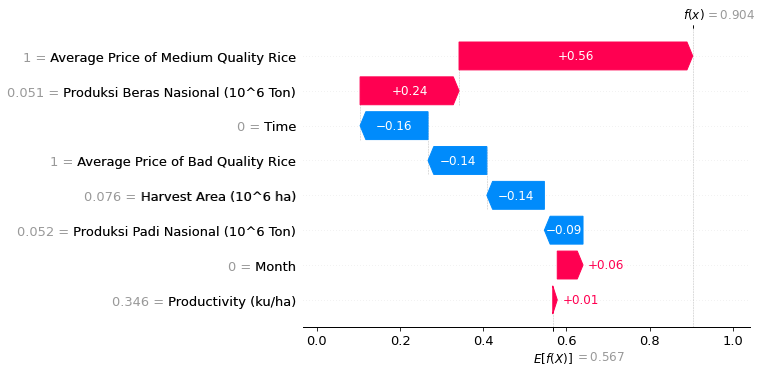

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values = explainer.shap_values(x_premium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_premium_train,link="logit")

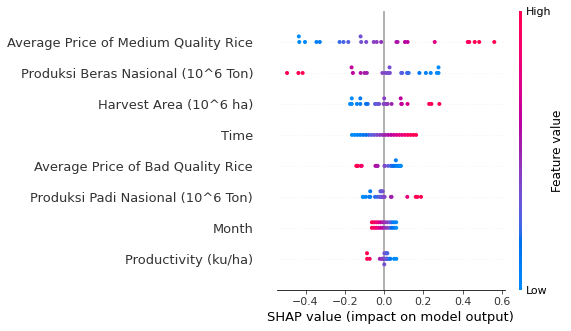

In [ ]:
shap.summary_plot(shap_values, x_premium_train)

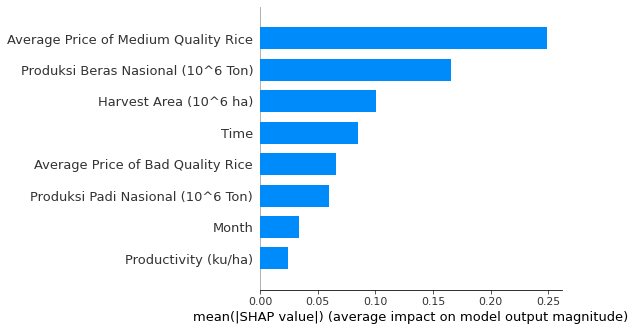

In [ ]:
shap.summary_plot(shap_values, x_premium_train, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Premium Quality Rice is  Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
explainer = shap.Explainer(regr, x_premium_test)
shap_values = explainer(x_premium_test)

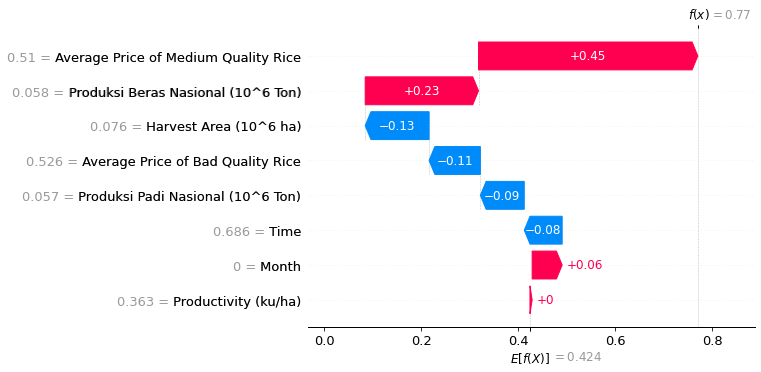

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values = explainer.shap_values(x_premium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_premium_test,link="logit")

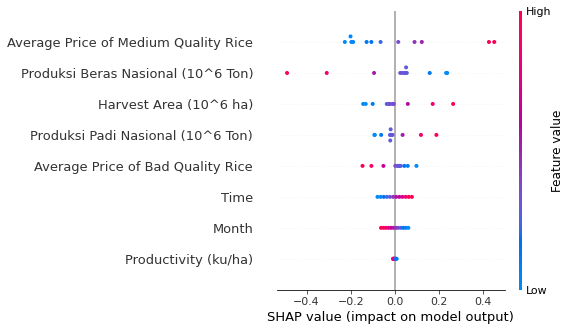

In [ ]:
shap.summary_plot(shap_values, x_premium_test)

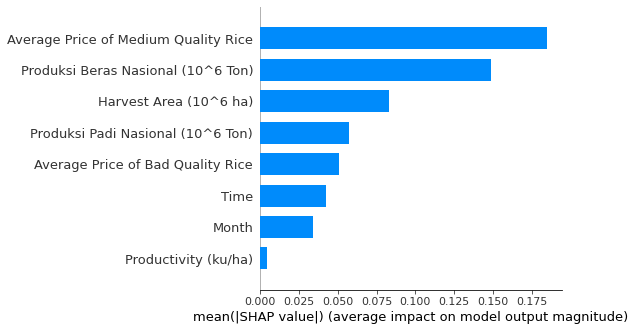

In [ ]:
shap.summary_plot(shap_values, x_premium_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Premium Quality Rice is  Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

## Random Forest
### Average Price of Premium Quality Rice

In [ ]:
# Train the model
regressor = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor.fit(x_premium_train,HargaBerasPremium_train)

accuracy = regressor.score(x_premium_train,HargaBerasPremium_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9683864958532387


Predicting on Train Data

In [ ]:
AvgPricePremium_train_with_randomforest = pd.Series(regressor.predict(x_premium_train), index=x_premium_train.index)

eval(evaluation_train,HargaBerasPremium_train,AvgPricePremium_train_with_randomforest,'Train RF Premium')

Predicting on Test Data

In [ ]:
AvgPricePremium_pred_with_randomforest = pd.Series(regressor.predict(x_premium_test), index=x_premium_test.index)

eval(evaluation_test,HargaBerasPremium_test,AvgPricePremium_pred_with_randomforest,'Test RF Premium')

# explain the model's predictions using SHAP

In [ ]:
explainer = shap.TreeExplainer(regressor)

Shap Explanation at Train Data

In [ ]:
shap_values = explainer.shap_values(x_premium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,x_premium_train,link="logit")

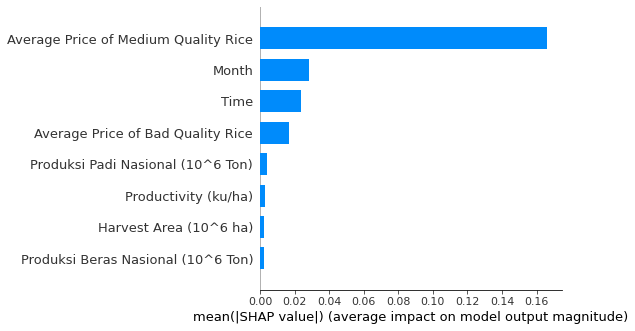

In [ ]:
shap.summary_plot(shap_values, x_premium_train, plot_type="bar")

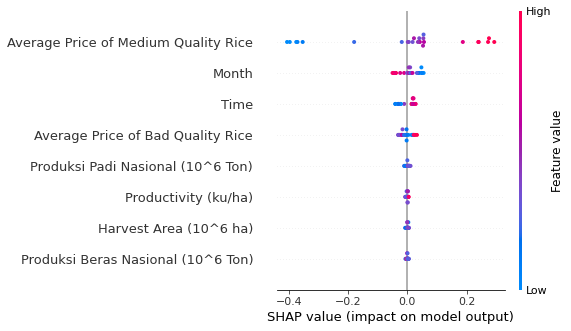

In [ ]:
shap.summary_plot(shap_values, x_premium_train)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Premium Quality Rice is  Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shap Explanation at Test Data

In [ ]:
shap_values = explainer.shap_values(x_premium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,x_premium_test,link="logit")

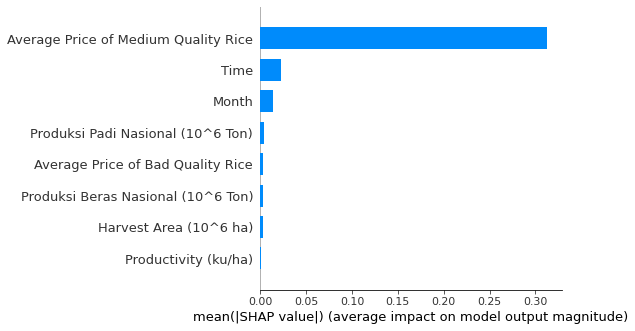

In [ ]:
shap.summary_plot(shap_values, x_premium_test, plot_type="bar")

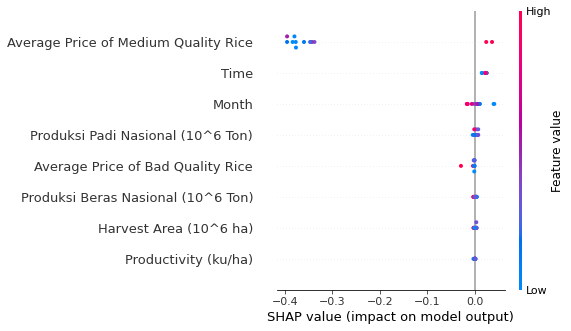

In [ ]:
shap.summary_plot(shap_values, x_premium_test)

    The feature important that has the largest average SHAP value in the Random Forest method on Premium Quality Rice is Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

### SIMPLE LINEAR REGRESSION
### Average Price of Medium Quality Rice

In [ ]:
# Train the model
model2 = LinearRegression()
model2.fit(Time_train, HargaBerasMedium_train)

# Koefisien model
print ('Coefficients: ', model2.coef_)
print ('Intercept: ',model2.intercept_)

Coefficients:  [-0.03151566]
Intercept:  0.5882390543884172


Predicting on Train Data

In [ ]:
AvgPriceMedium_train = pd.Series(model2.predict(Time_train), index=Time_train.index)

eval(evaluation_train,HargaBerasMedium_train,AvgPriceMedium_train,'Train SLR Medium')

Predicting on Test Data

In [ ]:
AvgPriceMedium_pred = pd.Series(model2.predict(Time_test), index=Time_test.index)

eval(evaluation_test,HargaBerasMedium_test,AvgPriceMedium_pred,'Test SLR Medium')

### Multiple Linear Regression
### Average Price of Medium Quality Rice

In [ ]:
regr_v2 = LinearRegression()
regr_v2.fit(x_medium_train, HargaBerasMedium_train)

print('Coefficients: ', regr_v2.coef_)
print ('Intercept: ',regr_v2.intercept_)

accuracy = regr_v2.score(x_medium_train,HargaBerasMedium_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [ 0.4302224   0.61763649 -0.16939179 -0.31255941  0.5200206   0.11075759
 -0.0405756  -0.03391047]
Intercept:  -0.08255243415606506
Model Accuracy:  0.9475140265566709


Predicting on Train Data

In [ ]:
AvgPriceMedium_train_v2 = pd.Series(regr_v2.predict(x_medium_train), index=x_medium_train.index)

eval(evaluation_train,HargaBerasMedium_train,AvgPriceMedium_train_v2,'Train MLR Medium')

Predicting on Test Data

In [ ]:
AvgPriceMedium_pred_v2 = pd.Series(regr_v2.predict(x_medium_test), index=x_medium_test.index)

eval(evaluation_test,HargaBerasMedium_test,AvgPriceMedium_pred_v2,'Test MLR Medium')

explain the model's predictions using SHAP

Shapley on Train Data

In [ ]:
explainer = shap.LinearExplainer(regr_v2, x_medium_train)
shap_values = explainer(x_medium_train)

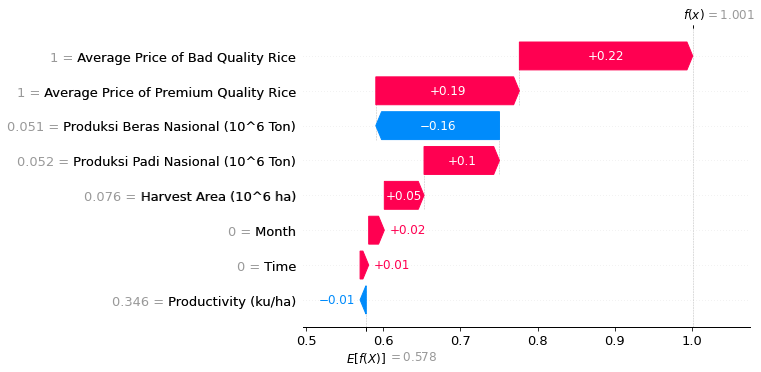

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values_v2 = explainer.shap_values(x_medium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_v2, x_medium_train,link="logit")

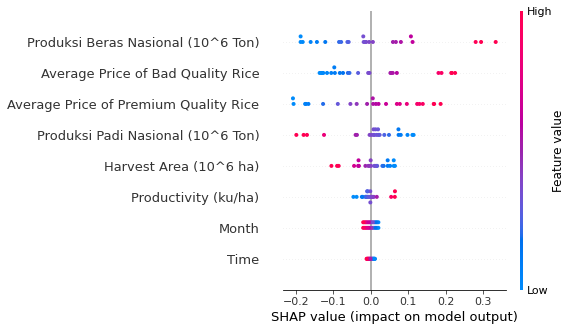

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_train)

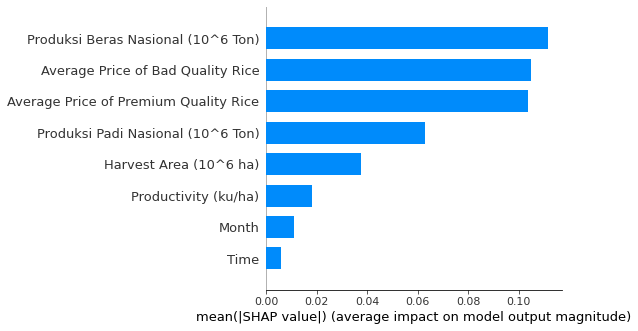

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Medium Quality Rice is  Produksi Beras Nasional. High values of the Produksi Beras Nasional variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
explainer_v2 = shap.LinearExplainer(regr_v2, x_medium_test)
shap_values_v2 = explainer_v2(x_medium_test)

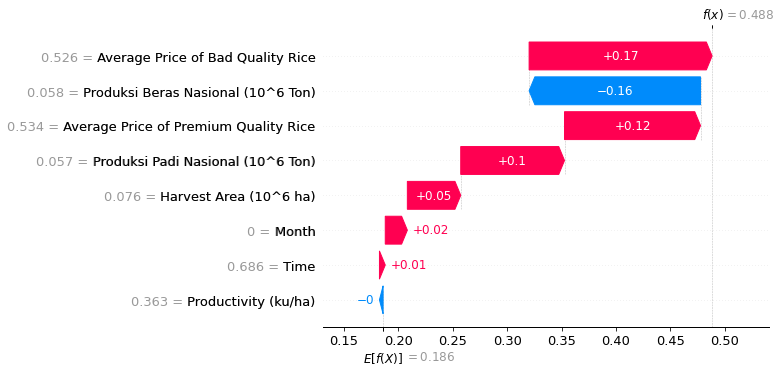

In [ ]:
shap.plots.waterfall(shap_values_v2[0])

In [ ]:
shap_values_v2 = explainer_v2.shap_values(x_medium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer_v2.expected_value, shap_values_v2, x_medium_test,link="logit")

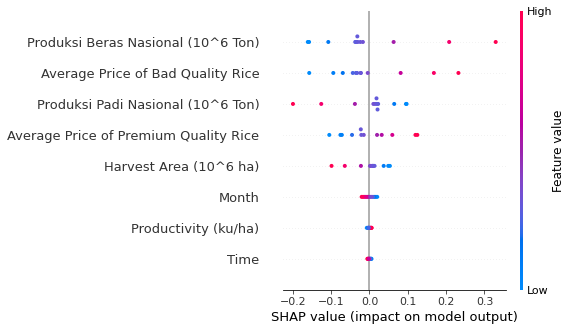

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_test)

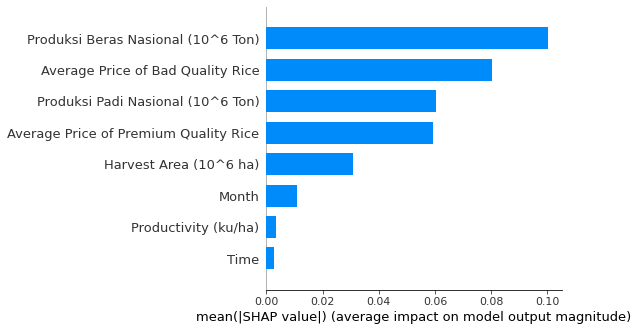

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Medium Quality Rice is  Produksi Beras Nasional. High values of the Produksi Beras Nasional variable have a high positive contribution on the prediction, while low values have a high negative contribution.

## Random Forest
### Average Price of Medium Quality Rice

In [ ]:
# Train the model
regressor2 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor2.fit(x_medium_train, HargaBerasMedium_train)

accuracy = regressor2.score(x_medium_train, HargaBerasMedium_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.984467709193502


Predicting on Train Data

In [ ]:
AvgPriceMedium_train_with_randomforest = pd.Series(regressor2.predict(x_medium_train), index=x_medium_train.index)

eval(evaluation_train,HargaBerasMedium_train,AvgPriceMedium_train_with_randomforest,'Train RF Medium')

Predicting on Test Data

In [ ]:
AvgPriceMedium_pred_with_randomforest = pd.Series(regressor2.predict(x_medium_test), index=x_medium_test.index)

eval(evaluation_test,HargaBerasMedium_test,AvgPriceMedium_pred_with_randomforest,'Test RF Medium')

Explain the model's predictions using SHAP

In [ ]:
explainer = shap.TreeExplainer(regressor2)

Shapley on Train Data

In [ ]:
shap_values = explainer.shap_values(x_medium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_medium_train,link="logit")

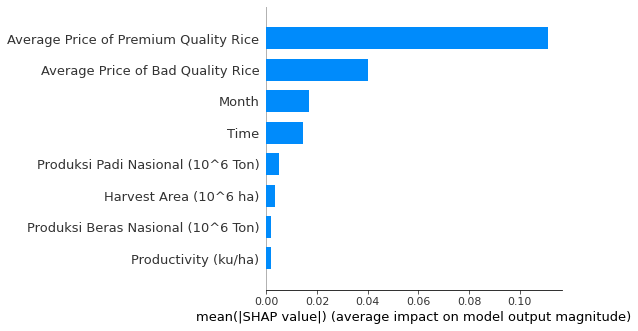

In [ ]:
shap.summary_plot(shap_values, x_medium_train, plot_type="bar")

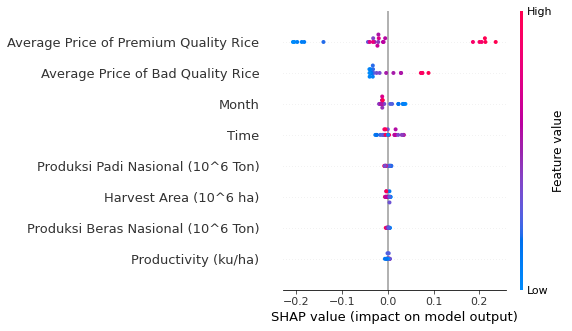

In [ ]:
shap.summary_plot(shap_values, x_medium_train)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Medium Quality Rice is  Average Price of Premium Quality Rice. High values of the Average Price of Premium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
shap_values = explainer.shap_values(x_medium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_medium_test,link="logit")

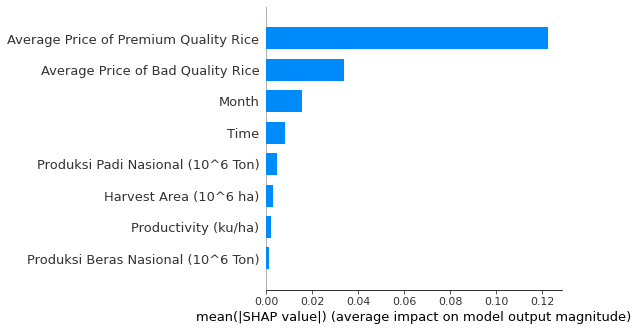

In [ ]:
shap.summary_plot(shap_values, x_medium_test, plot_type="bar")

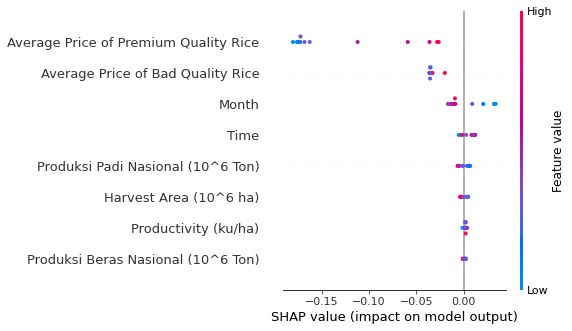

In [ ]:
shap.summary_plot(shap_values, x_medium_test)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Medium Quality Rice is  Average Price of Premium Quality Rice. 

### SIMPLE LINEAR REGRESSION
### Average Price of Bad Quality Rice

In [ ]:
# Train the model
model3 = LinearRegression()
model3.fit(Time_train, HargaBerasLuarkualitas_train)

# Koefisien model
print ('Coefficients: ', model3.coef_)
print ('Intercept: ',model3.intercept_)

accuracy = model3.score(Time_train,HargaBerasLuarkualitas_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [-0.29113015]
Intercept:  0.7318282505585215
Model Accuracy:  0.08475109763276922


Predicting on Train Data

In [ ]:
AvgPriceBad_train = pd.Series(model3.predict(Time_train), index=Time_train.index)

eval(evaluation_train,HargaBerasLuarkualitas_train,AvgPriceBad_train,'Train SLR Bad')

Predicting on Test Data

In [ ]:
AvgPriceBad_pred = pd.Series(model3.predict(Time_test), index=Time_test.index)

eval(evaluation_test,HargaBerasLuarkualitas_test,AvgPriceBad_pred,'Test SLR Bad')

### Multiple Linear Regression
### Average Price of Bad Quality Rice

In [ ]:
regr_v3 = LinearRegression()
regr_v3.fit(x_bad_train,HargaBerasLuarkualitas_train)

print('Coefficients: ', regr_v3.coef_)
print ('Intercept: ',regr_v3.intercept_)

accuracy = regr_v3.score(x_bad_train,HargaBerasLuarkualitas_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [-0.1669102   0.82049854 -0.85239129  0.33528767  0.34457138 -0.08696782
 -0.01180304 -0.20587186]
Intercept:  0.4444972431954459
Model Accuracy:  0.9091254084835223


Predicting on Train Data

In [ ]:
AvgPriceBad_train_v2 = pd.Series(regr_v3.predict(x_bad_train), index=x_bad_train.index)

eval(evaluation_train,HargaBerasLuarkualitas_train,AvgPriceBad_train_v2,'Train MLR Bad')

Predicting on Test Data

In [ ]:
AvgPriceBad_pred_v2 = pd.Series(regr_v3.predict(x_bad_test), index=x_bad_test.index)

eval(evaluation_test,HargaBerasLuarkualitas_test,AvgPriceBad_pred_v2,'Test MLR Bad')

Explain the model's predictions using SHAP

Shapley on Train Data

In [ ]:
explainer = shap.LinearExplainer(regr_v3, x_bad_train)
shap_values = explainer(x_bad_train)

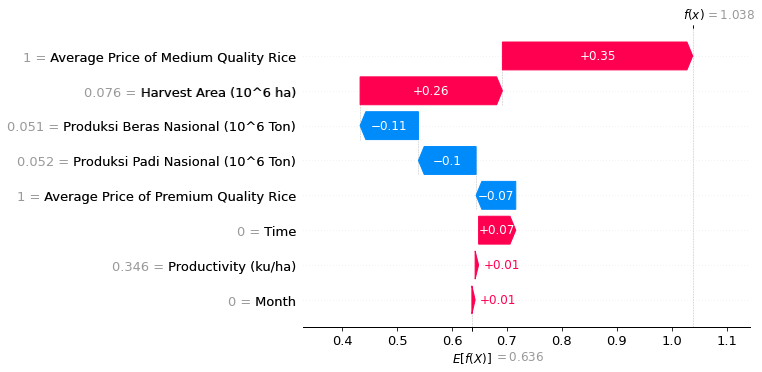

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values = explainer.shap_values(x_bad_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_bad_train,link="logit")

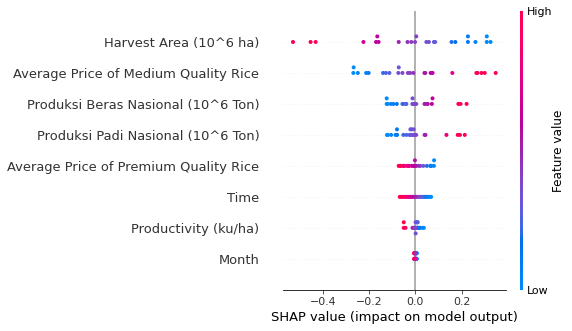

In [ ]:
shap.summary_plot(shap_values, x_bad_train)

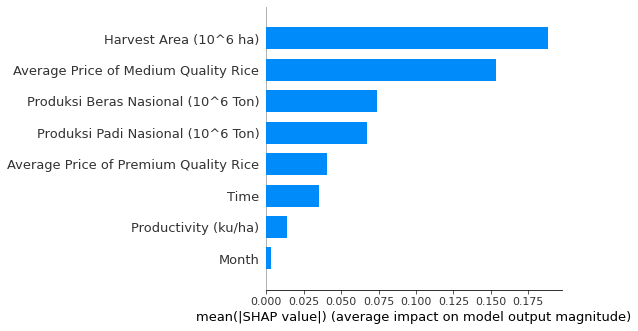

In [ ]:
shap.summary_plot(shap_values, x_bad_train, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Bad Quality Rice is Harvest Area. High values of the Harvest Area variable have a high negative contribution on the prediction, while low values have a high positive contribution.

Shapley on Test Data

In [ ]:
explainer_v3 = shap.LinearExplainer(regr_v3, x_bad_test)
shap_values_v3 = explainer_v3(x_bad_test)

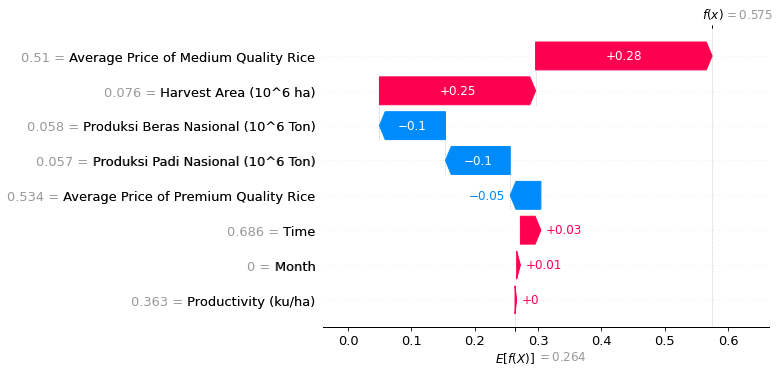

In [ ]:
shap.plots.waterfall(shap_values_v3[0])

In [ ]:
shap_values_v3 = explainer_v3.shap_values(x_bad_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer_v3.expected_value, shap_values_v3, x_bad_test,link="logit")

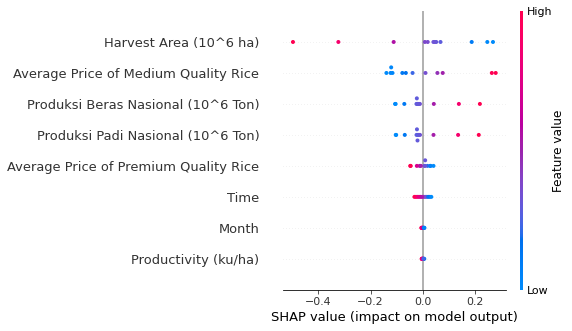

In [ ]:
shap.summary_plot(shap_values_v3, x_bad_test)

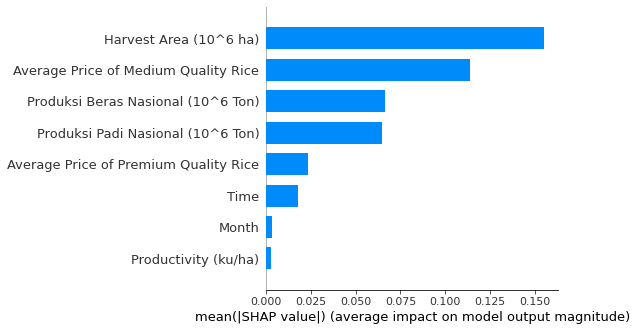

In [ ]:
shap.summary_plot(shap_values_v3, x_bad_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Bad Quality Rice is Harvest Area. High values of the Harvest Area variable have a high negative contribution on the prediction, while low values have a high positive contribution.

## Random Forest
### Average Price of Bad Quality Rice

In [ ]:
# Train the model
regressor3 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor3.fit(x_bad_train, HargaBerasLuarkualitas_train)

accuracy = regressor3.score(x_bad_train, HargaBerasLuarkualitas_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9692554471154428


Predicting on Train Data

In [ ]:
AvgPriceBad_train_with_randomforest = pd.Series(regressor3.predict(x_bad_train), index=x_bad_train.index)

eval(evaluation_train,HargaBerasLuarkualitas_train,AvgPriceBad_train_with_randomforest,'Train RF Bad')

Predicting on Test Data

In [ ]:
AvgPriceBad_pred_with_randomforest = pd.Series(regressor3.predict(x_bad_test), index=x_bad_test.index)

eval(evaluation_test,HargaBerasLuarkualitas_test,AvgPriceBad_pred_with_randomforest,'Test RF Bad')

Explain the model's predictions using SHAP

In [ ]:
explainer = shap.TreeExplainer(regressor3)

Shapley on Train Data

In [ ]:
shap_values = explainer.shap_values(x_bad_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_bad_train,link="logit")

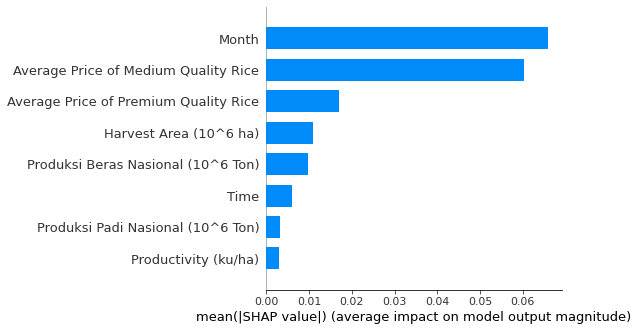

In [ ]:
shap.summary_plot(shap_values, x_bad_train, plot_type="bar")

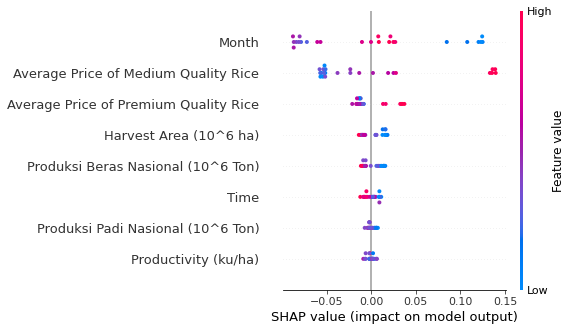

In [ ]:
shap.summary_plot(shap_values, x_bad_train)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Bad Quality Rice is Month. 

Shapley on Test Data

In [ ]:
shap_values = explainer.shap_values(x_bad_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_bad_test,link="logit")

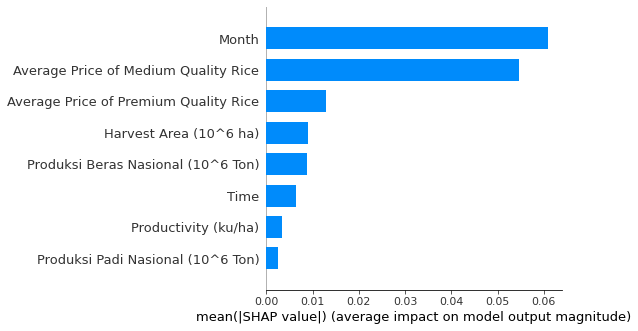

In [ ]:
shap.summary_plot(shap_values, x_bad_test, plot_type="bar")

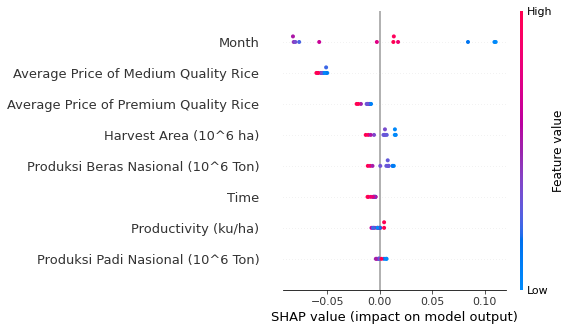

In [ ]:
shap.summary_plot(shap_values, x_bad_test)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Bad Quality Rice is Month. 

Returns the MinMaxScaler value to get the actual data 

Premium Rice

In [ ]:
HargaBerasPremium_test = HargaBerasPremium_test.to_numpy()
HargaBerasPremium_test = np.reshape(HargaBerasPremium_test, (-1,1)) 
HargaBerasPremium_test = mmscalar_premium.inverse_transform(HargaBerasPremium_test)
HargaBerasPremium_test = np.reshape(HargaBerasPremium_test, (12,))
HargaBerasPremium_test = pd.Series(HargaBerasPremium_test, index=x_premium_test.index)

In [ ]:
AvgPricePremium_pred = AvgPricePremium_pred.to_numpy()
AvgPricePremium_pred = np.reshape(AvgPricePremium_pred, (-1,1)) 
AvgPricePremium_pred = mmscalar_premium.inverse_transform(AvgPricePremium_pred)
AvgPricePremium_pred = np.reshape(AvgPricePremium_pred, (12,))
AvgPricePremium_pred = pd.Series(AvgPricePremium_pred, index=x_premium_test.index)

In [ ]:
AvgPricePremium_pred_v2 = AvgPricePremium_pred_v2.to_numpy()
AvgPricePremium_pred_v2 = np.reshape(AvgPricePremium_pred_v2, (-1,1)) 
AvgPricePremium_pred_v2 = mmscalar_premium.inverse_transform(AvgPricePremium_pred_v2)
AvgPricePremium_pred_v2 = np.reshape(AvgPricePremium_pred_v2, (12,))
AvgPricePremium_pred_v2 = pd.Series(AvgPricePremium_pred_v2, index=x_premium_test.index)

In [ ]:
AvgPricePremium_pred_with_randomforest = AvgPricePremium_pred_with_randomforest.to_numpy()
AvgPricePremium_pred_with_randomforest = np.reshape(AvgPricePremium_pred_with_randomforest, (-1,1)) 
AvgPricePremium_pred_with_randomforest = mmscalar_premium.inverse_transform(AvgPricePremium_pred_with_randomforest)
AvgPricePremium_pred_with_randomforest = np.reshape(AvgPricePremium_pred_with_randomforest, (12,))
AvgPricePremium_pred_with_randomforest = pd.Series(AvgPricePremium_pred_with_randomforest, index=x_premium_test.index)

Medium

In [ ]:
HargaBerasMedium_test = HargaBerasMedium_test.to_numpy()
HargaBerasMedium_test = np.reshape(HargaBerasMedium_test, (-1,1)) 
HargaBerasMedium_test = mmscalar_medium.inverse_transform(HargaBerasMedium_test)
HargaBerasMedium_test = np.reshape(HargaBerasMedium_test, (12,))
HargaBerasMedium_test = pd.Series(HargaBerasMedium_test, index=x_medium_test.index)

In [ ]:
AvgPriceMedium_pred = AvgPriceMedium_pred.to_numpy()
AvgPriceMedium_pred = np.reshape(AvgPriceMedium_pred, (-1,1)) 
AvgPriceMedium_pred = mmscalar_medium.inverse_transform(AvgPriceMedium_pred)
AvgPriceMedium_pred = np.reshape(AvgPriceMedium_pred, (12,))
AvgPriceMedium_pred = pd.Series(AvgPriceMedium_pred, index=x_medium_test.index)

In [ ]:
AvgPriceMedium_pred_v2 = AvgPriceMedium_pred_v2.to_numpy()
AvgPriceMedium_pred_v2 = np.reshape(AvgPriceMedium_pred_v2, (-1,1)) 
AvgPriceMedium_pred_v2 = mmscalar_medium.inverse_transform(AvgPriceMedium_pred_v2)
AvgPriceMedium_pred_v2 = np.reshape(AvgPriceMedium_pred_v2, (12,))
AvgPriceMedium_pred_v2 = pd.Series(AvgPriceMedium_pred_v2, index=x_medium_test.index)

In [ ]:
AvgPriceMedium_pred_with_randomforest = AvgPriceMedium_pred_with_randomforest.to_numpy()
AvgPriceMedium_pred_with_randomforest = np.reshape(AvgPriceMedium_pred_with_randomforest, (-1,1)) 
AvgPriceMedium_pred_with_randomforest = mmscalar_medium.inverse_transform(AvgPriceMedium_pred_with_randomforest)
AvgPriceMedium_pred_with_randomforest = np.reshape(AvgPriceMedium_pred_with_randomforest, (12,))
AvgPriceMedium_pred_with_randomforest = pd.Series(AvgPriceMedium_pred_with_randomforest, index=x_medium_test.index)

Bad

In [ ]:
HargaBerasLuarkualitas_test= HargaBerasLuarkualitas_test.to_numpy()
HargaBerasLuarkualitas_test= np.reshape(HargaBerasLuarkualitas_test, (-1,1)) 
HargaBerasLuarkualitas_test= mmscalar_bad.inverse_transform(HargaBerasLuarkualitas_test)
HargaBerasLuarkualitas_test= np.reshape(HargaBerasLuarkualitas_test, (12,))
HargaBerasLuarkualitas_test= pd.Series(HargaBerasLuarkualitas_test, index=x_bad_test.index)

In [ ]:
AvgPriceBad_pred= AvgPriceBad_pred.to_numpy()
AvgPriceBad_pred= np.reshape(AvgPriceBad_pred, (-1,1)) 
AvgPriceBad_pred= mmscalar_bad.inverse_transform(AvgPriceBad_pred)
AvgPriceBad_pred= np.reshape(AvgPriceBad_pred, (12,))
AvgPriceBad_pred= pd.Series(AvgPriceBad_pred, index=x_bad_test.index)

In [ ]:
AvgPriceBad_pred_v2= AvgPriceBad_pred_v2.to_numpy()
AvgPriceBad_pred_v2= np.reshape(AvgPriceBad_pred_v2, (-1,1)) 
AvgPriceBad_pred_v2= mmscalar_bad.inverse_transform(AvgPriceBad_pred_v2)
AvgPriceBad_pred_v2= np.reshape(AvgPriceBad_pred_v2, (12,))
AvgPriceBad_pred_v2= pd.Series(AvgPriceBad_pred_v2, index=x_bad_test.index)

In [ ]:
AvgPriceBad_pred_with_randomforest= AvgPriceBad_pred_with_randomforest.to_numpy()
AvgPriceBad_pred_with_randomforest= np.reshape(AvgPriceBad_pred_with_randomforest, (-1,1)) 
AvgPriceBad_pred_with_randomforest= mmscalar_bad.inverse_transform(AvgPriceBad_pred_with_randomforest)
AvgPriceBad_pred_with_randomforest= np.reshape(AvgPriceBad_pred_with_randomforest, (12,))
AvgPriceBad_pred_with_randomforest= pd.Series(AvgPriceBad_pred_with_randomforest, index=x_bad_test.index)

### Collection of Visualizations

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

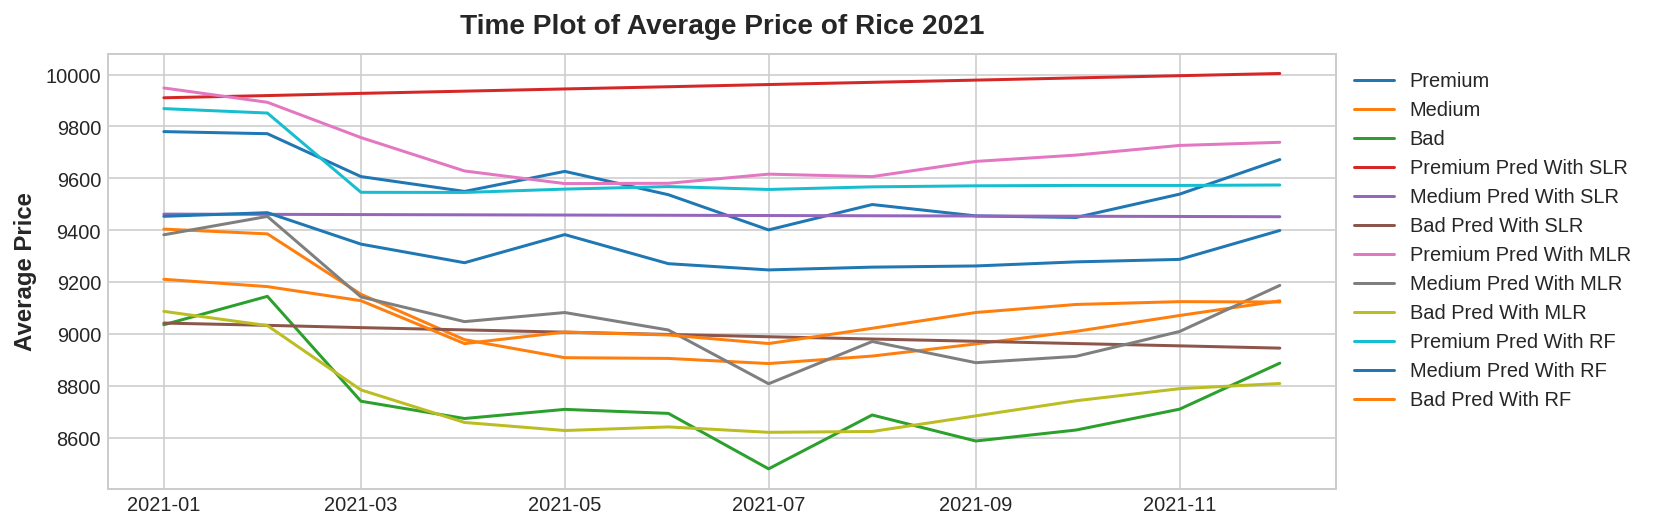

In [ ]:
plt.plot(HargaBerasPremium_test,label='Premium') 
plt.plot(HargaBerasMedium_test,label='Medium') 
plt.plot(HargaBerasLuarkualitas_test,label='Bad')
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Rice 2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

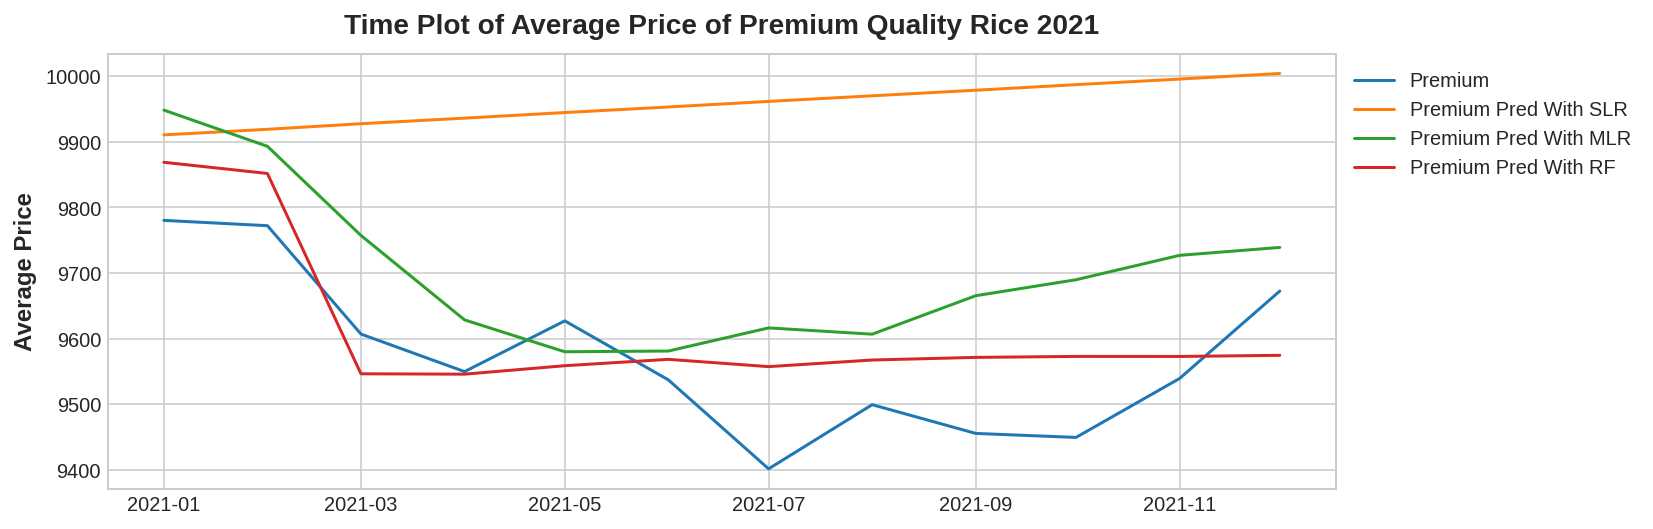

In [ ]:
plt.plot(HargaBerasPremium_test,label='Premium') 
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.title('Time Plot of Average Price of Premium Quality Rice 2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

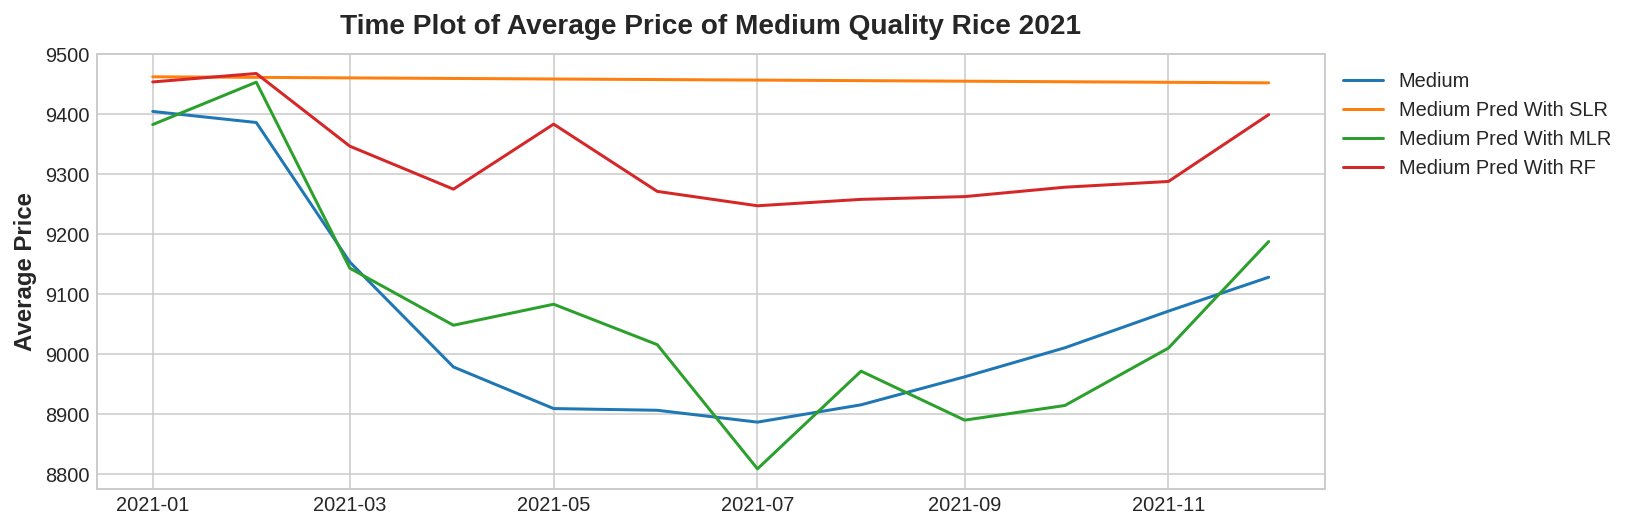

In [ ]:
plt.plot(HargaBerasMedium_test,label='Medium') 
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.title('Time Plot of Average Price of Medium Quality Rice 2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

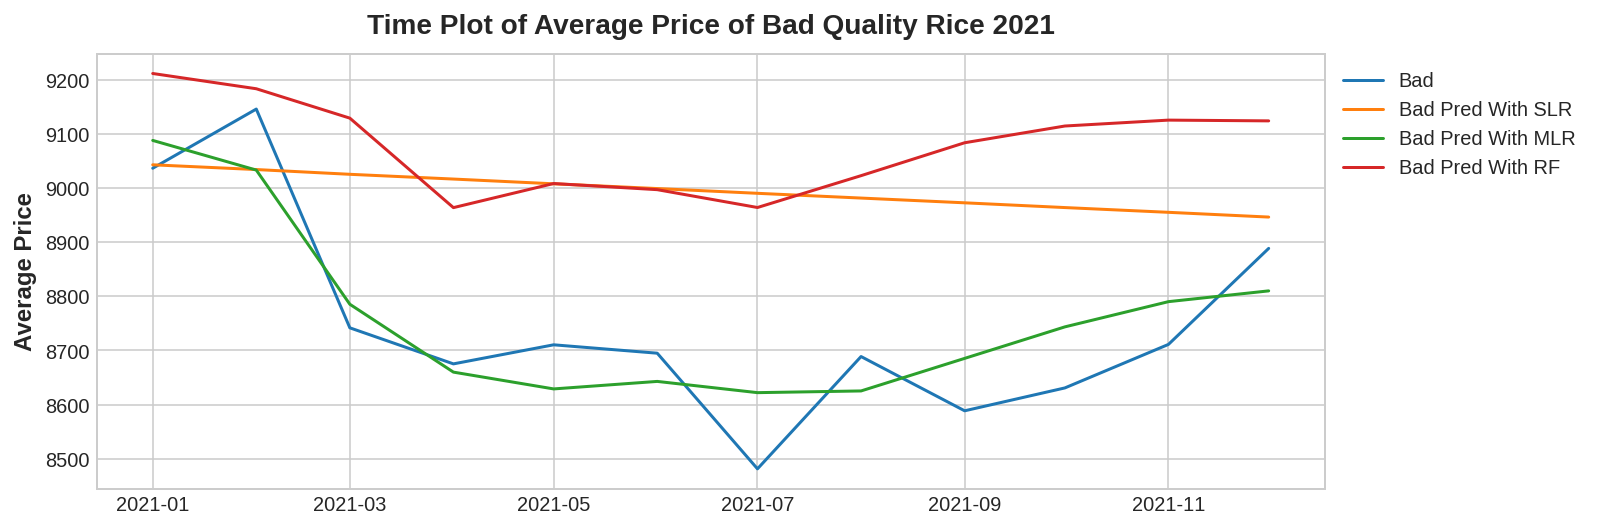

In [ ]:
plt.plot(HargaBerasLuarkualitas_test,label='Bad')  
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Bad Quality Rice 2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

Mean Absolute Error (MAE) 

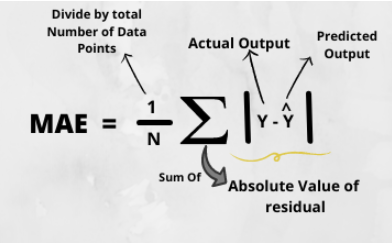

Mean Squared Error(MSE)

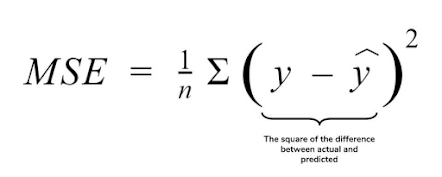

Mean Absolute Percentage Error (MAPE)

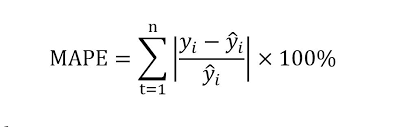

Root Mean Squared Error(RMSE) or root-mean-square deviation (RNSD)

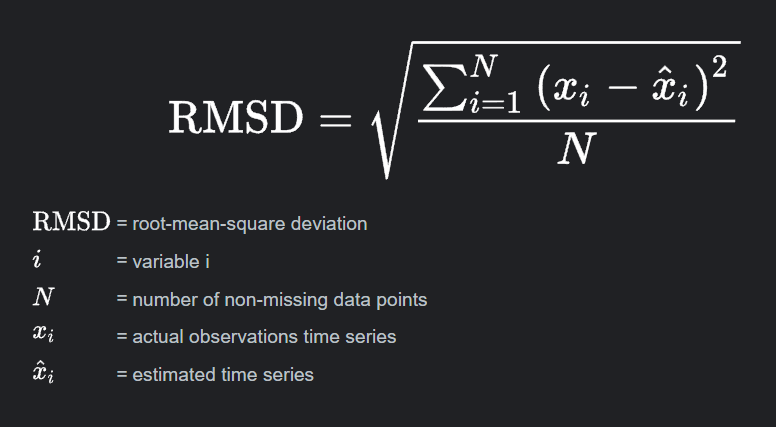


Root Mean Squared Log Error(RMSLE)

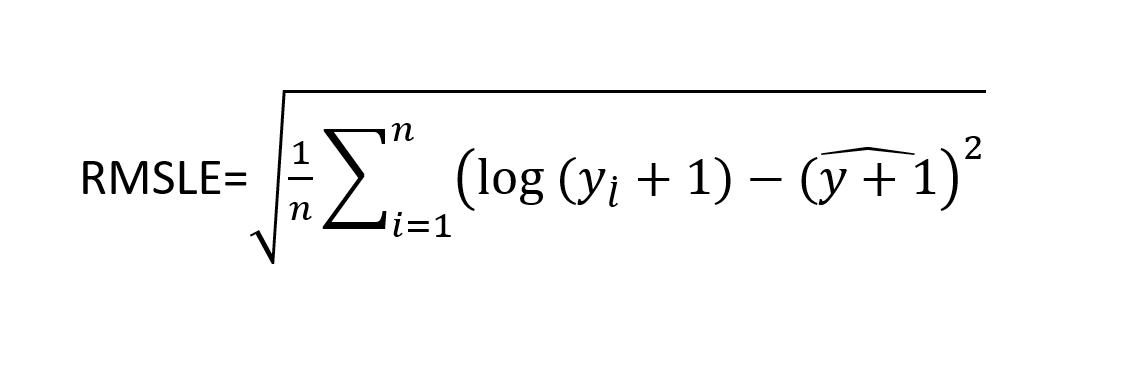

R Squared

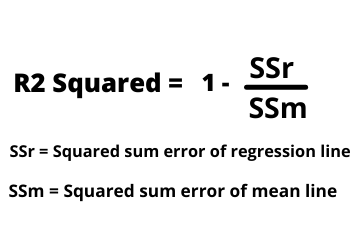

In [ ]:
data_eval_train = pd.DataFrame(evaluation_train)
data_eval_train

Train SLR Premium  Train MLR Premium  Train RF Premium  \
MAE                 0.233959           0.067261          0.038715   
MSE                 0.075700           0.008279          0.002611   
MAPE                0.859057           0.161144          0.093529   
R squared           0.083376           0.899751          0.968386   
RMSE                0.275136           0.090990          0.051096   
RMSLE              -1.290491          -2.397010         -2.974047   

           Train SLR Medium  Train MLR Medium  Train RF Medium  Train SLR Bad  \
MAE                0.185469          0.038925         0.023140       0.157171   
MSE                0.050945          0.002676         0.000792       0.035803   
MAPE               0.396696          0.078297         0.046684       0.259943   
R squared          0.000762          0.947514         0.984468       0.084751   
RMSE               0.225710          0.051730         0.028141       0.189217   
RMSLE             -1.488503         -2.961726        -3.570539      -1.664863   

           Train MLR Bad  Train RF Bad  
MAE             0.046500      0.028483  
MSE             0.003555      0.001203  
MAPE            0.085626      0.051530  
R squared       0.909125      0.969255  
RMSE            0.059623      0.034680  
RMSLE          -2.819720     -3.361604

In [ ]:
data_eval_test = pd.DataFrame(evaluation_test)
data_eval_test

Test SLR Premium  Test MLR Premium  Test RF Premium  \
MAE            5.398022e-01      1.920908e-01     1.088591e-01   
MSE            3.277056e-01      4.550019e-02     1.519275e-02   
MAPE           2.961654e+14      1.135942e+14     8.237692e+13   
R squared     -1.111779e+01     -6.824906e-01     4.382078e-01   
RMSE           5.724558e-01      2.133077e-01     1.232589e-01   
RMSLE         -5.578198e-01     -1.545019e+00    -2.093469e+00   

           Test SLR Medium  Test MLR Medium  Test RF Medium  Test SLR Bad  \
MAE           3.915931e-01     7.182752e-02    2.639518e-01  2.499751e-01   
MSE           1.814631e-01     6.714912e-03    8.248975e-02  7.907047e-02   
MAPE          2.106280e+14     2.875866e+13    1.332342e+14  1.810027e+14   
R squared    -5.340023e+00     7.653920e-01   -1.882057e+00 -1.737357e+00   
RMSE          4.259848e-01     8.194457e-02    2.872103e-01  2.811947e-01   
RMSLE        -8.533515e-01    -2.501712e+00   -1.247541e+00 -1.268708e+00   

           Test MLR Bad   Test RF Bad  
MAE        7.327104e-02  3.106729e-01  
MSE        6.372805e-03  1.119765e-01  
MAPE       5.004714e+13  1.716736e+14  
R squared  7.793785e-01 -2.876537e+00  
RMSE       7.982985e-02  3.346288e-01  
RMSLE     -2.527858e+00 -1.094733e+00